### 1.1

In [204]:
import numpy as np
import re
import matplotlib.pyplot as plt

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


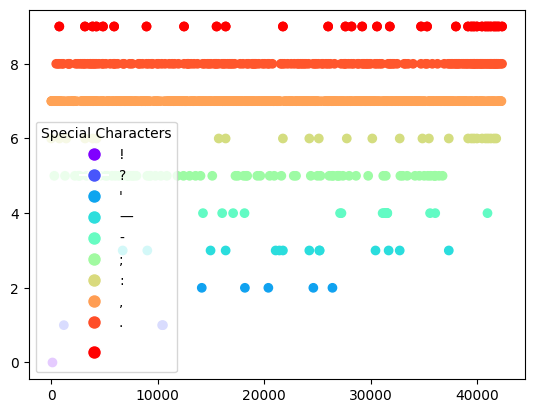

In [205]:
# plot, where special characters appear in the text
special_characters = ["!", "?", "'", "—", "-", ";", ":",",",".", "\n"]
appearances = []
character_index=0
for line in lines:
    for c in line:
        if c in special_characters:
            # if c is a special character, add to the appearances list the index of the character in the text 
            #      and the index of the special character in the special_characters list
            appearances.append([character_index,special_characters.index(c)])
        character_index+=1
        
# scatterplot
appearances = np.array(appearances)
plt.scatter(appearances[:,0], appearances[:,1], c=appearances[:,1], cmap='rainbow')



# Create a legend for the y-axis levels
cmap = plt.get_cmap('rainbow')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(special_char_index/len(special_characters)*9/8), markersize=10, label=special_char_index) 
           for special_char_index, special_char in enumerate(special_characters)]
plt.legend(handles, special_characters, title="Special Characters")

In [206]:
# find last appearance of ;
last_appearance = appearances[appearances[:,1]==5][-1][0]
print("Last appearance of ; is at character", last_appearance)
# what # sentence is this?
sentence_index = 0
character_index = 0
for line in lines:
    for c in line:
        if character_index == last_appearance:
            print("Last appearance of ; is in sentence", sentence_index)
            break
        character_index+=1
        if c == "." or c == "!" or c == "?":
            sentence_index+=1
        



Last appearance of ; is at character 36734
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 150
Last appearance of ; is in sentence 1

In [207]:
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ') # removes things like "KRITAS: " 
regex_unwantend = re.compile(r"[,\-'\n:;—]") # gets replaced by space
regex_other_punctuation = re.compile(r'[!?]') # ends a sentence
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7631
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 195
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [208]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()   
words = [w.strip() for w in words if w.strip()] # -> "" is not a word
words = list(set(words))



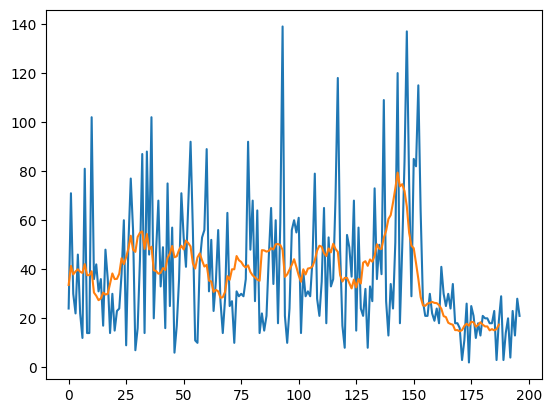

In [209]:
# print sentence length over time
sentence_lengths = [len(s.split()) for s in sentences]
plt.plot(sentence_lengths)
# print rolling average of sentence length
lookback = 10
rolling_average = np.convolve(sentence_lengths, np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)

In [210]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list]

# get filtered sentences
filtered_sentences = []
for sentence in sentences:
    filtered_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_list and len(word) > 3])
    filtered_sentences.append(filtered_sentence)
    
example = 10
print(sentences[example])
print(filtered_sentences[example])

for if we consider the likenesses which painters make of bodies divine and heavenly and the different degrees of gratification with which the eye of the spectator receives them we shall see that we are satisfied with the artist who is able in any degree to imitate the earth and its mountains and the rivers and the woods and the universe and the things that are and move therein and further that knowing nothing precise about such matters we do not examine or analyze the painting all that is required is a sort of indistinct and deceptive mode of shadowing them forth
consider likenesses painters make bodies divine heavenly different degrees gratification spectator receives shall satisfied artist able degree imitate earth mountains rivers woods universe things move therein knowing nothing precise matters examine analyze painting required sort indistinct deceptive mode shadowing forth


[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
# select which words to use
relevant_words = filtered_words

In [212]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k, sentence in enumerate(sentences):
    for i, word in enumerate(relevant_words):
        term_sentence_matrix[i, k] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for k in range(len(sentences)):
    normalized_term_sentence_matrix[:,k] = term_sentence_matrix[:,k] / np.linalg.norm(term_sentence_matrix[:,k])


# sentence 1: "term1 term2 term3"
# sentence 2: "term1 term3 term1 term 4 term 1"
# term sentence matrix: 
# term1 term2 term3 term4
# 1    1    1    0            /3
# 3    0    1    1            /5

# normalized term sentence matrix:
# term1 term2 term3 term4
# 1/3  1/3  1/3  0
# 3/5  0    1/5  1/5



print(term_sentence_matrix.shape)


(1595, 197)


In [213]:
# verify term sentence matrix
sentence_index = 20
print(sentences[sentence_index])

print("----")
for k, word in enumerate(relevant_words):
    if normalized_term_sentence_matrix[k, sentence_index] > 0:
        print(word, normalized_term_sentence_matrix[k, sentence_index])
        

the warning socrates which you have addressed to him i must also take to myself
----
addressed 0.30151134457776363
also 0.30151134457776363
socrates 0.30151134457776363
war 0.30151134457776363
must 0.30151134457776363
us 0.30151134457776363
self 0.30151134457776363
take 0.30151134457776363
warn 0.30151134457776363
warning 0.30151134457776363
add 0.30151134457776363


In [214]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix) # make a standard svd
rank = 20 # specify the rank of the approximation we want
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank]) # cut all the components to size of the rank
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank # reconstruct the matrix with the rank reduction
print(term_sentence_matrix_rank)

[[ 7.77065114e-04 -1.02949319e-03 -8.29493869e-04 ... -2.30257036e-03
  -1.22938829e-03  1.15614828e-03]
 [ 2.55634063e-03  5.01063354e-03  1.28873127e-03 ... -8.14133982e-04
  -3.68265304e-03  8.30845533e-04]
 [ 9.94204096e-03  6.17577229e-03  1.87849600e-02 ...  1.95778015e-02
   1.88418598e-02  1.72986653e-02]
 ...
 [ 5.13930860e-03 -2.25318456e-03 -5.26316874e-03 ... -1.62776397e-04
   9.69018376e-04  2.98183994e-03]
 [-4.17349976e-03  1.27674095e-03  1.44640064e-02 ...  8.83687923e-03
  -3.54010380e-03  1.40614934e-02]
 [-2.24133496e-03  1.42986281e-03 -2.90894202e-05 ...  2.03136589e-03
   2.93127479e-04 -1.30682981e-03]]


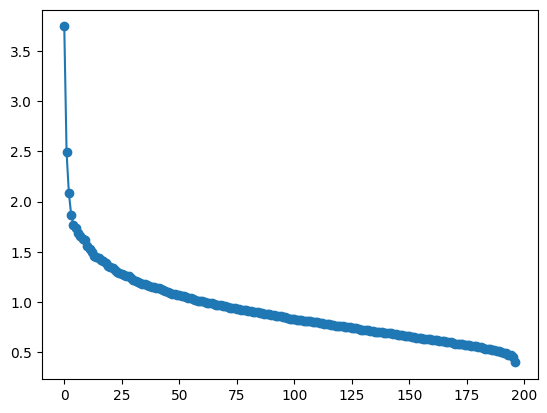

In [215]:
# plot singular values
plt.plot(s, 'o-')

### 1.2

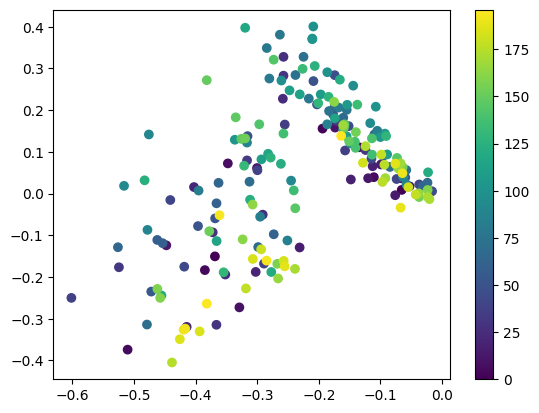

In [216]:
# use singular vecotrs for 2D representation of sentences
u1 = U_rank[:, 0] # orthonormal basis of the range fo the rank 2 approximation of the term sentence matrix
u2 = U_rank[:, 1]
dataX1= np.dot(u1, normalized_term_sentence_matrix)
dataX2= np.dot(u2, normalized_term_sentence_matrix)
plt.scatter(dataX1, dataX2, c=np.arange(len(sentences)), cmap='viridis')
plt.colorbar()

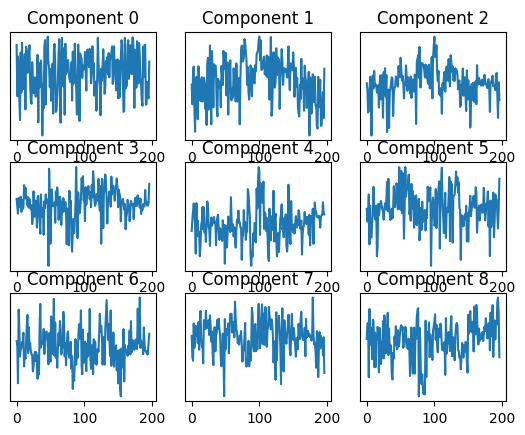

In [217]:
# get all components
component_coordinates = np.dot(U_rank.T, normalized_term_sentence_matrix)

# plot first 9 in 3x3 grid
fig, axs = plt.subplots(3, 3)
for k in range(3):
    for i in range(3):
        comp_num= k*3+i
        axs[k, i].plot(component_coordinates[comp_num, :])
        axs[k, i].set_title(f'Component {comp_num}')
        # remove axis labels
        axs[k, i].set_yticks([])

### 1.3

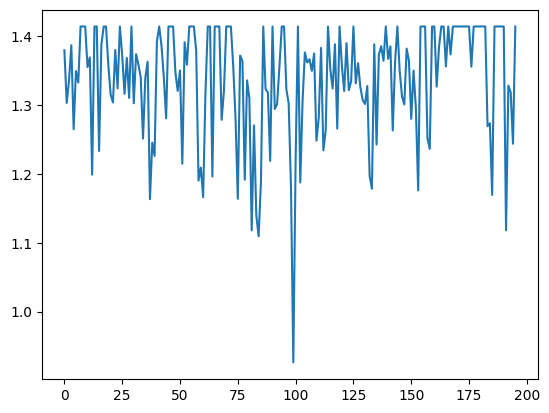

In [230]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
distances = []
for k in range(len(sentences)-1):
    distance = np.linalg.norm(normalized_term_sentence_matrix[:, k] - normalized_term_sentence_matrix[:, k+1])
    distances.append(distance)
plt.plot(distances)

In [219]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids from seed
    np.random.seed(6)
    # choose first k/2 and K/2 last points as centroids
    centroids = np.vstack([X[:k//2], X[-k//2:]])
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



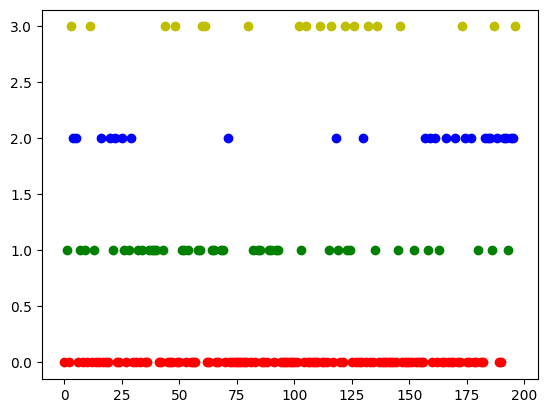

In [220]:
# plot the data with the k-means clustering
number_of_clusters = 4
labels = kmeans(term_sentence_matrix_rank.T, number_of_clusters)
colors = ['r', 'g', 'b','y','orange', 'purple']
for k in range(len(sentences)):
    plt.scatter(k, labels[k], color=colors[labels[k]])
# legend

In [221]:
# get "topics" from centroids
centroids = []
for label in range(number_of_clusters):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for k, centroid in enumerate(centroids):
    print("Topic", k)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
art 0.05828654581976437
one 0.05226474042567502
red 0.04713726521916019
go 0.046409933651402495
land 0.04620396033986098
man 0.044727973428267356
king 0.04408427444818517
men 0.042240417852252
ten 0.03771583160233144
ran 0.03681462291323548
Topic 1
us 0.3001879774889178
men 0.08924991131093865
man 0.06399551484111123
name 0.05152229148069453
aid 0.05068102386316254
use 0.05065325468034932
red 0.04904401610410435
land 0.04378786659239398
art 0.04074364509317232
said 0.038578474997007436
Topic 2
us 0.3825629953906592
let 0.07710611402117401
ran 0.057625508414788744
mind 0.047717853927184105
timaeus 0.04664708880490559
use 0.04642709736834661
must 0.041517820089589826
may 0.03697844371058034
go 0.031432845096564986
tin 0.030735843782907155
Topic 3
din 0.22873797143795901
round 0.07032107300201676
men 0.06885069596187925
sea 0.06032291996522578
us 0.05487887351961978
man 0.04865191544316862
ten 0.04564364001804524
ever 0.04556636192074359
day 0.04285118786487319
tin 0.0416345693930

In [222]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1595,)
(197,)


In [223]:
# show most salient words
word_saliency = {}
for k, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[k])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.0002689562781417919
0.11609107652958185 	 place
0.11609107652958185 	 pilots
0.06367851276666671 	 raised
0.020536616255723335 	 cover
0.020536616255723335 	 circumference
0.01907175692401166 	 sight
0.015657280207026666 	 offices
0.015657280207026666 	 last
0.01387909853080594 	 point
0.01367578049430001 	 painting
0.01367578049430001 	 procure
0.013391144085677495 	 exercise
0.013391144085677495 	 curiously
0.013074204205905292 	 pair
0.013074204205905292 	 minds
0.011667134141535118 	 gratification
0.011667134141535118 	 pulse
0.011222392720360021 	 lathe
0.011222392720360021 	 barrier
0.011052596568108287 	 regulated
0.011052596568108287 	 trust
0.010723572724513195 	 clearer
0.007677332608343425 	 successive
0.007677332608343425 	 prayer
0.007477855887057633 	 extraordinary
0.007477855887057633 	 side
0.006627160714538927 	 fear
0.006627160714538927 	 erichthonius
0.006414433479939475 	 supremacy
0.006082152394954838 	 old
0.005981974318880529 	 influence
0

### 1.4

In [224]:
# show most salient sentences
sentence_saliency = {}
for k, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[k])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.14770904806928703
with this in mind i am ready to take my turn and delve into the matters that concern us confident in the support and forbearance of this esteemed company
-----------------
0.11816076211709055
with a heavy heart zeus issued his decree that atlantis as it had been should be no more
-----------------
0.11816076211709055
the gods then set about their task and in their wisdom they brought forth great cataclysms and earthquakes submerging atlantis beneath the waves to be remembered only in the annals of history and in the tales passed down through the ages
-----------------
0.11043317704892015
then they drew from the bowl in golden cups and pouring a libation on the fire they swore that they would judge according to the laws on the pillar and would punish him who in any point had already transgressed them and that for the future they would not if they could help offend against the writing on the pillar and would neither command others nor obey any ruler who commanded them

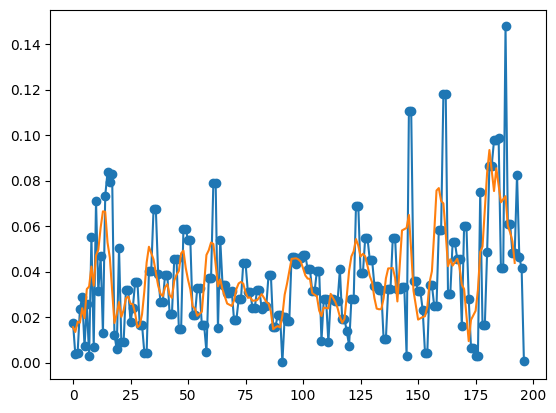

In [225]:
# plot saliency scores
plt.plot([sentence_saliency[sentence] for sentence in sentences], 'o-')
# rolling average
lookback = 5
rolling_average = np.convolve([sentence_saliency[sentence] for sentence in sentences], np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)


/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/bela/git/matrixmethods_dataanalysis/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6865: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 6.000e+00,
        0.000e+00, 4.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 7.000e+00, 1.407e+03, 5.000e+00, 2.000e+00, 0.000e+00,
        1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        6.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 8.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+0

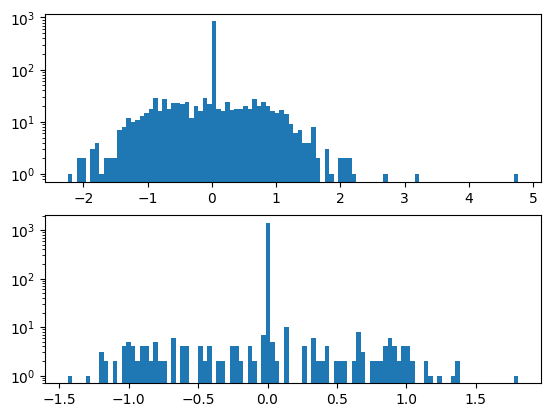

In [226]:
# calculate the follow frequency of words
split = 150
word_follow_frequency1 = np.zeros((len(relevant_words), len(relevant_words)))
word_follow_frequency2 = np.zeros((len(relevant_words), len(relevant_words)))
for sentence in sentences[:split]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency1[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break
for sentence in sentences[split:]:
    words = sentence.split()
    for k in range(len(words)-1):
        for i in range(k+1, len(words)):
            if words[k] in relevant_words and words[i] in relevant_words:
                word_follow_frequency2[relevant_words.index(words[k]), relevant_words.index(words[i])] += 1
                break

# plot the different eigenvalues as histogram with log scale
fig, axs = plt.subplots(2)

axs[0].hist(np.linalg.eig(word_follow_frequency1)[0], bins=100, log=True)
axs[1].hist(np.linalg.eig(word_follow_frequency2)[0], bins=100, log=True)
# axs[0].plot(np.linalg.eig(word_follow_frequency1)[0], 'o-')
# axs[1].plot(np.linalg.eig(word_follow_frequency2)[0], 'o-')

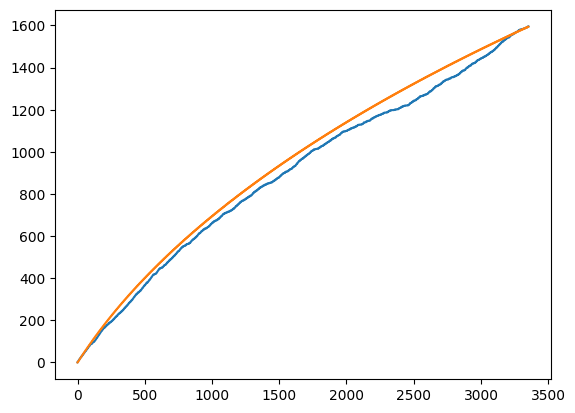

In [227]:
# another approach: look at all the unique words 
# get word sequence
word_sequence = []
for sentence in sentences:
    word_sequence += sentence.split()
word_sequence = [w for w in word_sequence if w in relevant_words]

# unique words until k
unique_words_until = []
unique_words_set = set()
for i in range(len(word_sequence)):
    unique_words_set.add(word_sequence[i])
    unique_words_until.append(len(unique_words_set))

#plot with log scale
plt.plot(unique_words_until)

# contrast with expected number (statistically, if words are drawn uniformly at random)
term_multiplicities = np.zeros(len(relevant_words))
for word in word_sequence:
    term_multiplicities[relevant_words.index(word)] += 1
# calculate expected number of unique words (formula found online: https://www.adellera.it/static_html/investigations/distinct_balls/distinct_balls.pdf)
def expected_unique_words(n, term_multiplicity):
    word_number = np.sum(term_multiplicity)
    sum=0
    for term_multiplicity in term_multiplicity:
        prod = 1
        for i in range(int(term_multiplicity)):
            prod = prod*(1-n/(word_number-i))
        sum += 1-prod
    return int(sum)

expected_unique_words_list = [expected_unique_words(i, term_multiplicities) for i in range(len(word_sequence))]
plt.plot(expected_unique_words_list)



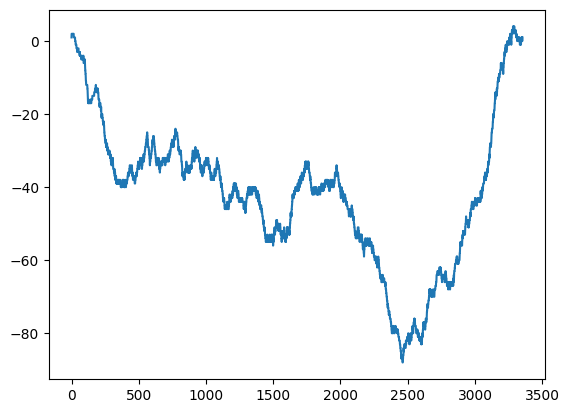

In [228]:
# plot the difference
plt.plot(np.array(unique_words_until) - np.array(expected_unique_words_list))

In [229]:
# expect split to be at minimum
split = np.argmin(np.array(unique_words_until) - np.array(expected_unique_words_list))
# find the sentence that splits the text
sentences_used = filtered_sentences
sentence_index = -1
word_counter = 0
for k in range(len(sentences_used)):
    sentence_index = k
    word_counter += len(sentences_used[k].split())
    if word_counter > split:
        break
print(sentence_index)
print(sentences[sentence_index])


146
then they drew from the bowl in golden cups and pouring a libation on the fire they swore that they would judge according to the laws on the pillar and would punish him who in any point had already transgressed them and that for the future they would not if they could help offend against the writing on the pillar and would neither command others nor obey any ruler who commanded them to act otherwise than according to the laws of their father poseidon
